<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>March 2, 2018: compositional inverse
<br>February 26, 2018: splitting from generic nb
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Ctors for (symbolic) Riordan arrays.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t, alpha

from sequences import *

init_printing()

In [22]:
m = 5
d_fn, h_fn = Function('d'), Function('h')
d, h = IndexedBase('d'), IndexedBase('h')

---

## By series convolution

In [26]:
d_series = Eq(d_fn(t), 1+sum(d[i]*t**i for i in range(1,m)))
h_series = Eq(h_fn(t), t*(1+sum(h[i]*t**i for i in range(1,m-1)))).expand()

d_series, h_series

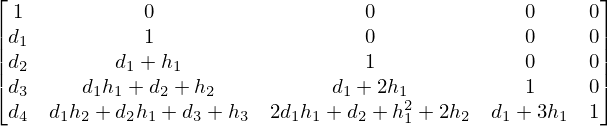

In [27]:
R = Matrix(m, m, riordan_matrix_by_convolution(m, d_series, h_series))
R

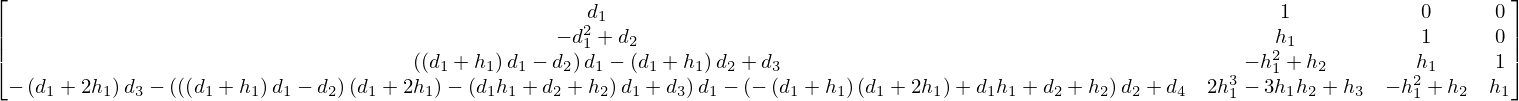

In [28]:
production_matrix(R) # too verbose to show

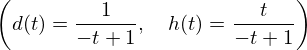

In [16]:
d_series = Eq(d_fn(t), 1/(1-t))
h_series = Eq(h_fn(t), t*d_series.rhs)

d_series, h_series

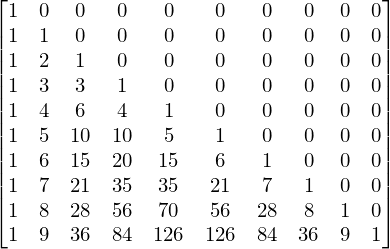

In [21]:
R = Matrix(10, 10, riordan_matrix_by_convolution(m, d_series, h_series))
R

## By recurrence relation

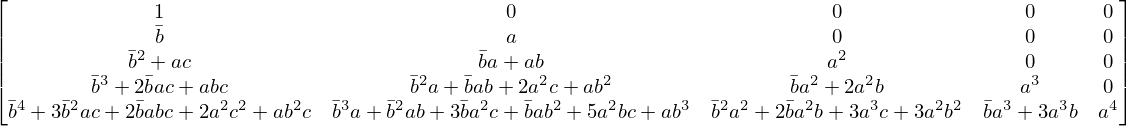

In [33]:
dim = 5
a, b, b_bar, c = symbols(r'a b \bar{b} c')
M = Matrix(dim, dim, 
           riordan_matrix_by_recurrence(
               dim, lambda n, k: {(n-1, k-1):a, 
                                  (n-1, k): b if k else b_bar, 
                                  (n-1, k+1):c}))
M

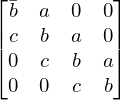

In [34]:
production_matrix(M)

## By $A, Z$ sequences

### $\mathcal{P}$

In [53]:
A, Z = Function('A'), Function('Z')
A_eq = Eq(A(t), 1 + t)
Z_eq = Eq(Z(t),1)
A_eq, Z_eq

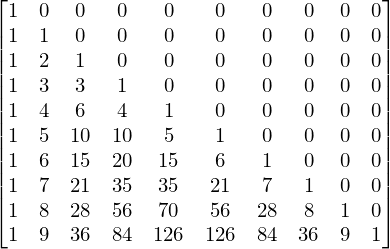

In [55]:
R = Matrix(10, 10, riordan_matrix_by_AZ_sequences(10, (Z_eq, A_eq)))
R

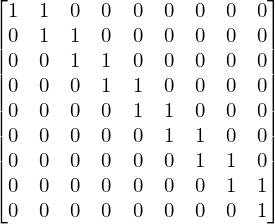

In [56]:
production_matrix(R)

### $\mathcal{C}$

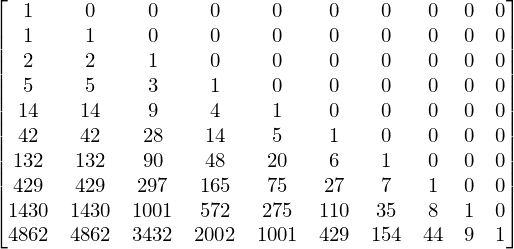

In [57]:
A = Function('A')
A_ones = Eq(A(t), 1/(1-t))
R = Matrix(10, 10, riordan_matrix_by_AZ_sequences(10, (A_ones, A_ones)))
R

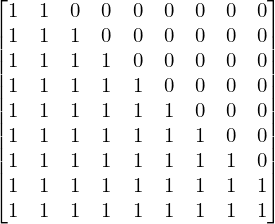

In [58]:
production_matrix(R)

### $\mathcal{R}$

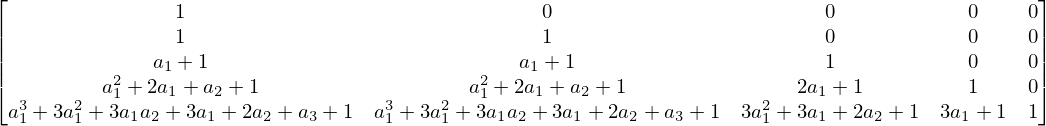

In [65]:
dim = 5
A = Function('A')
a = IndexedBase('a')
A_gen = Eq(A(t), sum((a[j] if j else 1)*t**j for j in range(dim)))
R = Matrix(dim, dim, riordan_matrix_by_AZ_sequences(dim, (A_gen, A_gen)))
R

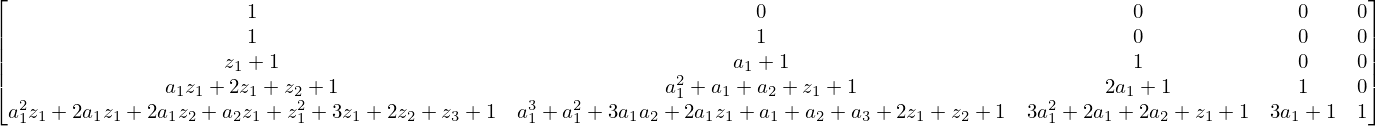

In [66]:
z = IndexedBase('z')
A_gen = Eq(A(t), sum((a[j] if j else 1)*t**j for j in range(dim)))
Z_gen = Eq(Z(t), sum((z[j] if j else 1)*t**j for j in range(dim)))
Raz = Matrix(dim, dim, riordan_matrix_by_AZ_sequences(dim, (Z_gen, A_gen)))
Raz

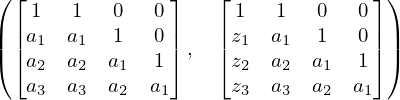

In [67]:
production_matrix(R), production_matrix(Raz)

## Compositional inverse

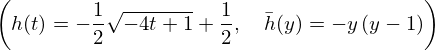

In [69]:
H = Function('h')
C_eq = Eq(H(t), (1-sqrt(1-4*t))/2)
C_eq, compositional_inverse(C_eq)

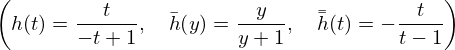

In [70]:
P_eq = Eq(H(t), t/(1-t))
(P_eq, 
 compositional_inverse(P_eq), 
 compositional_inverse(compositional_inverse(P_eq), y=t))

## Exponential RA

build the triangle of Stirling numbers of the II kind

In [71]:
d_series = Eq(d_fn(t), 1)
h_series = Eq(h_fn(t), exp(t)-1)
d_series, h_series 

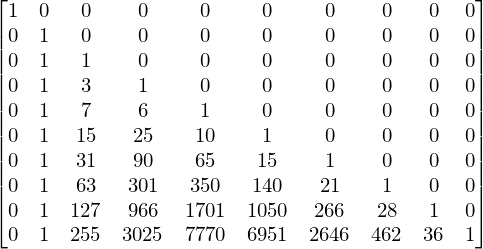

In [72]:
R = Matrix(10, 10, riordan_matrix_exponential(
            riordan_matrix_by_convolution(10, d_series, h_series)))
R

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.